# Linear Regression Example

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
url = "https://canvas.upenn.edu/files/87071245/download?download_frd=1"
df = pd.read_csv(url, index_col = 0) 
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


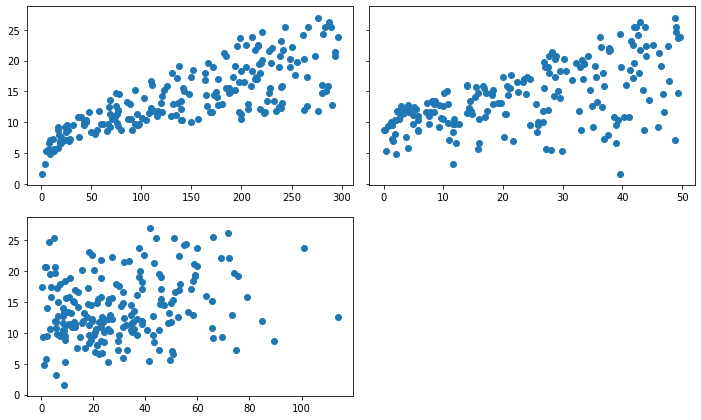

In [6]:
fig, axes = plt.subplots(2, 2, sharey=True, 
            figsize=(10,6))
plt.tight_layout(w_pad=0)
axes[0, 0].scatter(df.TV, df.sales)
axes[0, 1].scatter(df.radio, df.sales)
axes[1, 0].scatter(df.newspaper, df.sales)
axes[1, 1].remove()


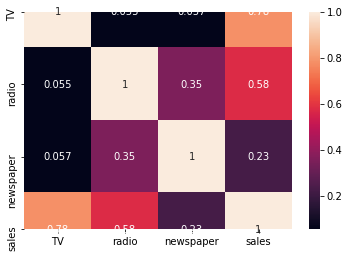

In [9]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [10]:
X = df[['TV']]
y = df.sales

In [11]:
from sklearn.linear_model  import  LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print(model.intercept_)
print(model.coef_)
print(f'  Y = {model.coef_[0]:.4f} * X + {model.intercept_:.4f}')

7.032593549127693
[0.04753664]
  Y = 0.0475 * X + 7.0326


In [14]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV', data=df).fit()
model.params

C:\Ananconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Intercept    7.032594
TV           0.047537
dtype: float64

In [17]:
type(model.params)

pandas.core.series.Series

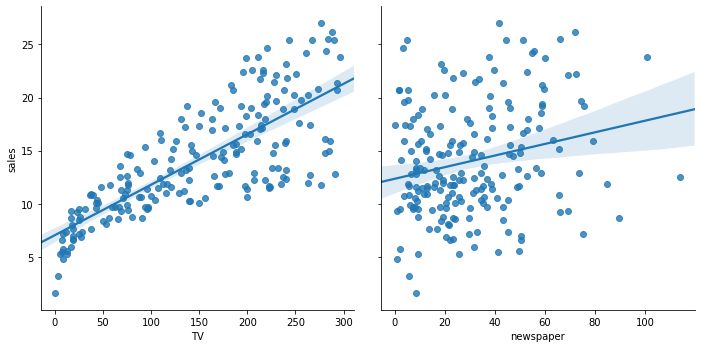

In [18]:
sns.pairplot(df, x_vars=['TV','newspaper'], y_vars=(['sales']),height=5, kind='reg')

In [23]:
print(model.conf_int())
print("------------print values of p-----")
print(model.pvalues)

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843
------------print values of p-----
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [39]:
smfmodel = smf.ols(formula='sales ~ TV', data=df).fit()
print(smfmodel.conf_int())
print("------------print values of p-----")
print(smfmodel.pvalues)
print(f'{smfmodel.pvalues[0]:5.4f} {smfmodel.pvalues[1]:5.4f}')
#Mean of lower limit to upper limit /2

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843
------------print values of p-----
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64
0.0000 0.0000


In [38]:
smfmodel = smf.ols(formula='sales ~ radio', data=df).fit()
print(smfmodel.conf_int())
print("------------print values of p-----")
print(smfmodel.pvalues)
print(f'{smfmodel.pvalues[0]:5.4f} {smfmodel.pvalues[1]:5.4f}')

                  0          1
Intercept  8.201588  10.421688
radio      0.162244   0.242747
------------print values of p-----
Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64
0.0000 0.0000


In [37]:
smfmodel = smf.ols(formula='sales ~ newspaper', data=df).fit()
print(smfmodel.conf_int())
print("------------print values of p-----")
print(smfmodel.pvalues)
print(f'{smfmodel.pvalues[0]:5.4f} {smfmodel.pvalues[1]:5.4f}')

                   0          1
Intercept  11.125956  13.576859
newspaper   0.022005   0.087381
------------print values of p-----
Intercept    4.713507e-49
newspaper    1.148196e-03
dtype: float64
0.0000 0.0011


In [40]:
fml = 'sales ~ TV'
model = smf.ols(formula=fml, data=df).fit()
print('pvalue', fml, ': ', end=' ')
print(f'{model.pvalues[0]:.8f} {model.pvalues[1]:.12f}')
fml = 'sales ~ radio'
model = smf.ols(formula=fml, data=df).fit()
print('pvalue', fml, ': ', end=' ')
print(f'{model.pvalues[0]:.8f} {model.pvalues[1]:.12f}')
fml = 'sales ~ newspaper'
model = smf.ols(formula=fml, data=df).fit()
print('pvalue', fml, ': ', end=' ')
print(f'{model.pvalues[0]:.8f} {model.pvalues[1]:.12f}')
fml = 'TV ~ newspaper'
model = smf.ols(formula=fml, data=df).fit()
print('pvalue', fml, ': ', end=' ')
print(f'{model.pvalues[0]:.8f} {model.pvalues[1]:.12f}')

pvalue sales ~ TV :  0.00000000 0.000000000000
pvalue sales ~ radio :  0.00000000 0.000000000000
pvalue sales ~ newspaper :  0.00000000 0.001148195869
pvalue TV ~ newspaper :  0.00000000 0.425601757882


In [41]:
#prediction using the same model

for tv_ad_spend in [50, 120, 150, 200]:
    sales = 7.032594 + tv_ad_spend * 0.047537
    print(tv_ad_spend, sales)

50 9.409444
120 12.737034
150 14.163143999999999
200 16.539994
